98260만개 data (교수님+우리+오리지널)

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "3_classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd 
nd1=np.load('mnist_20211236_total.npz')#이윤재
nd2=np.load('mnist_20201572_1.npz')#구유정
nd3=np.load('mnist_20171372.npz')#김석우
nd4=np.load('mnist_20170565.npz')#김성년
nd6=np.load('H_MNIST_train.npz')
print(nd1['img'].shape, nd1['img'].dtype, nd1['label'].shape, nd1['label'].dtype)
print(nd2['img'].shape, nd2['img'].dtype, nd2['label'].shape, nd2['label'].dtype)
print(nd3['img'].shape, nd3['img'].dtype, nd3['label'].shape, nd3['label'].dtype)
print(nd4['img'].shape, nd4['img'].dtype, nd4['label'].shape, nd4['label'].dtype)
print(nd6['img'].shape, nd6['img'].dtype, nd6['label'].shape, nd6['label'].dtype)

X=np.concatenate((nd1['img'], nd2['img'],nd3['img'],nd4['img'],nd6['img']), axis=0)
y=np.concatenate((nd1['label'], nd2['label'],nd3['label'],nd4['label'],nd6['label']), axis=0)
np.savez_compressed('mnist_all.npz', X=X, y=y)
nd5=np.load('mnist_all.npz')
nd5
X.shape
X=X.reshape(30720,784)
#X_new=X[23040:30720]
#y_new=y[23040:30720]
#X_new.shape
#y_new.shape
type(X)

(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int32
(1000, 28, 28) float64 (1000,) int32
(26720, 28, 28) float64 (26720,) int64


numpy.ndarray

data cleaning 작업

In [3]:
a_3=y[23110:23120]
b_3=y[23230:23340]
c_3=y[23420:23450]
d_3=y[23520:23720]
e_3=y[23770:23780]
f_3=y[23900:23920]
g_3=y[23970:24110]
h_3=y[24140:24270]
i_3=y[24780:28410]
j_3=y[28460:30720]
a_4=y[:2000]
b_4=y[2100:2070]
c_4=y[2210:2220]
d_4=y[2230:2280]
e_4=y[2410:2800]
f_4=y[2900:6980]
g_4=y[6900:7300]
h_4=y[7400:7500]
i_4=y[7600:7680]
a_5=y[15361:18700]
b_5=y[19120:19290]
c_5=y[19300:19310]
d_5=y[19320:21760]
e_5=y[21780:21790]
f_5=y[21800:21810]
g_5=y[21820:21830]
h_5=y[21840:21850]
i_5=y[21860:21880]
j_5=y[21890:23050]
a_6=y[7680:8200]
b_6=y[8220:8340]
c_6=y[8360:9310]
d_6=y[9520:11920]
e_6=y[11950:12120]
f_6=y[12220:15361]
y_new=np.concatenate((a_3,b_3,c_3,d_3,e_3,f_3,h_3,g_3,h_3,i_3,j_3,a_4, b_4,c_4,d_4,e_4,f_4,g_4,h_4,i_4,a_5,b_5,c_5,d_5,e_5,f_5,g_5,h_5,i_5
                     ,j_5,a_6,b_6,c_6,d_6,e_6,f_6))
y_new.shape

(28260,)

In [4]:
a=X[23110:23120]
b=X[23230:23340]
c=X[23420:23450]
d=X[23520:23720]
e=X[23770:23780]
f=X[23900:23920]
g=X[23970:24110]
h=X[24140:24270]
i=X[24780:28410]
j=X[28460:30720]
a_0=X[:2000]
b_0=X[2100:2070]
c_0=X[2210:2220]
d_0=X[2230:2280]
e_0=X[2410:2800]
f_0=X[2900:6980]
g_0=X[6900:7300]
h_0=X[7400:7500]
i_0=X[7600:7680]
a_1=X[15361:18700]
b_1=X[19120:19290]
c_1=X[19300:19310]
d_1=X[19320:21760]
e_1=X[21780:21790]
f_1=X[21800:21810]
g_1=X[21820:21830]
h_1=X[21840:21850]
i_1=X[21860:21880]
j_1= X[21890:23050]
a_2=X[7680:8200]
b_2=X[8220:8340]
c_2=X[8360:9310]
d_2=X[9520:11920]
e_2=X[11950:12120]
f_2=X[12220:15361]

X_new=np.concatenate((a,b,c,d,e,f,h,g,h,i,j,a_0, b_0,c_0,d_0,e_0,f_0,g_0,h_0,i_0,a_1,b_1,c_1,d_1,e_1,f_1,g_1,h_1,i_1
                     ,j_1,a_2,b_2,c_2,d_2,e_2,f_2))
X_new=X_new.reshape(28260,784)
X_new.shape


(28260, 784)

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X_mnist, y_mnist = mnist["data"], mnist["target"] # X, y: pandas DataFrame
y_mnist=y_mnist.astype(np.uint8)
X.shape
y.shape

(30720,)

In [ ]:
X_final=np.concatenate((X_new,X_mnist))
y_final=np.concatenate((y_new,y_mnist))

mnist를 dataframe 에서 array 로 변환(concatate 하더라도 mnist 변수 따로 쓰면 data frame 이므로.)

In [ ]:
X_mnist=np.array(X_mnist)


print(X_mnist.shape)
print(type(X_mnist))

y_mnist=np.array(y_mnist)


print(y_mnist.shape)
print(type(y_mnist))

(70000, 784)
<class 'numpy.ndarray'>
(70000,)
<class 'numpy.ndarray'>


3:1:1로 data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train0, X_test, y_train0, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle = True, random_state = 8)
X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train0,test_size=0.25,shuffle = True, random_state= 8) # 0.25 x 0.8 = 0.2

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(58956, 784) (19652, 784) (19652, 784)
(58956,) (19652,) (19652,)


------------------------------------------------------
##여기서부터 모델 학습

fit+scaling

In [ ]:
#일반적으로 standardscaler로 scaling
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

knn_clf=KNeighborsClassifier(n_jobs=-1,n_neighbors=3)

start_time=time.time()
knn_clf.fit(X_train,y_train)
print('Fit time : ', time.time()-start_time)

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

Fit time :  0.04448580741882324


array([0.83528394, 0.83981274, 0.84144107])

 성능 확인 accuracy

In [ ]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = knn_clf.predict(X_val)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_val, pred))

Fit time :  115.83886933326721
0.8483614899246896


knn confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def results(y_val, pred):
    print(classification_report(y_val,pred))
    print(confusion_matrix(y_val,pred))

    return confusion_matrix(y_val,pred)
conf_knn=results(y_val,pred)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1952
           1       0.59      0.99      0.74      2076
           2       0.90      0.85      0.87      1930
           3       0.90      0.82      0.86      1988
           4       0.94      0.83      0.88      1915
           5       0.91      0.81      0.86      1891
           6       0.92      0.86      0.89      1962
           7       0.87      0.86      0.87      2043
           8       0.97      0.76      0.85      1968
           9       0.91      0.82      0.86      1927

    accuracy                           0.85     19652
   macro avg       0.88      0.85      0.85     19652
weighted avg       0.87      0.85      0.85     19652

[[1721  179   12    9    3    2    7   15    2    2]
 [   2 2054    4    3    0    0    3    7    1    2]
 [  49  173 1636   22    6    4    3   28    5    4]
 [  39  129   79 1631    6   33    6   34   14   17]
 [  37  185   18    4 1585   

knn confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def results(y_val, pred):
    print(classification_report(y_val,pred))
    print(confusion_matrix(y_val,pred))

    return confusion_matrix(y_val,pred)
conf_knn=results(y_val,pred)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1952
           1       0.59      0.99      0.74      2076
           2       0.90      0.85      0.87      1930
           3       0.90      0.82      0.86      1988
           4       0.94      0.83      0.88      1915
           5       0.91      0.81      0.86      1891
           6       0.92      0.86      0.89      1962
           7       0.87      0.86      0.87      2043
           8       0.97      0.76      0.85      1968
           9       0.91      0.82      0.86      1927

    accuracy                           0.85     19652
   macro avg       0.88      0.85      0.85     19652
weighted avg       0.87      0.85      0.85     19652

[[1721  179   12    9    3    2    7   15    2    2]
 [   2 2054    4    3    0    0    3    7    1    2]
 [  49  173 1636   22    6    4    3   28    5    4]
 [  39  129   79 1631    6   33    6   34   14   17]
 [  37  185   18    4 1585   

confusion matrix error

Saving figure confusion_matrix_plot


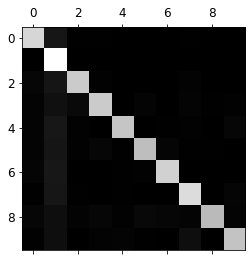

In [ ]:
plt.matshow(conf_knn, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
row_sums = conf_knn.sum(axis=1, keepdims=True)
norm_conf_knn = conf_knn / row_sums
norm_conf_knn

array([[8.81659836e-01, 9.17008197e-02, 6.14754098e-03, 4.61065574e-03,
        1.53688525e-03, 1.02459016e-03, 3.58606557e-03, 7.68442623e-03,
        1.02459016e-03, 1.02459016e-03],
       [9.63391137e-04, 9.89402697e-01, 1.92678227e-03, 1.44508671e-03,
        0.00000000e+00, 0.00000000e+00, 1.44508671e-03, 3.37186898e-03,
        4.81695568e-04, 9.63391137e-04],
       [2.53886010e-02, 8.96373057e-02, 8.47668394e-01, 1.13989637e-02,
        3.10880829e-03, 2.07253886e-03, 1.55440415e-03, 1.45077720e-02,
        2.59067358e-03, 2.07253886e-03],
       [1.96177062e-02, 6.48893360e-02, 3.97384306e-02, 8.20422535e-01,
        3.01810865e-03, 1.65995976e-02, 3.01810865e-03, 1.71026157e-02,
        7.04225352e-03, 8.55130785e-03],
       [1.93211488e-02, 9.66057441e-02, 9.39947781e-03, 2.08877285e-03,
        8.27676240e-01, 2.61096606e-03, 5.74412533e-03, 9.39947781e-03,
        0.00000000e+00, 2.71540470e-02],
       [1.95663670e-02, 8.98995241e-02, 1.11052353e-02, 2.59122158e-02,
   

4를 9로 잘못 인식한 것이 유난히 많음

Saving figure confusion_matrix_errors_plot


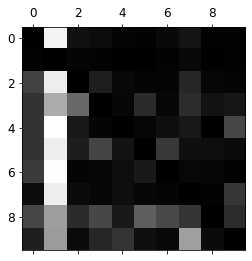

In [ ]:
np.fill_diagonal(norm_conf_knn, 0)
plt.matshow(norm_conf_knn, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

auc 성능

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve
total=0
for i in range(10):
      y_train_i=(y_train==i)
      y_val_i=(y_test==i)

      y_scores = cross_val_predict(knn_clf, X_train, y_train_i, cv=3) 
      fpr, tpr, thresholds = roc_curve(y_train_i, y_scores)
      print("class",i," auc_score",roc_auc_score(y_train_i, y_scores))
      total+=roc_auc_score(y_train_i, y_scores)

class 0  auc_score 0.9233516730850027
class 1  auc_score 0.9585566049939278
class 2  auc_score 0.913421381710614
class 3  auc_score 0.89266235483838
class 4  auc_score 0.9054071555162295
class 5  auc_score 0.8890670885459443
class 6  auc_score 0.920189810001961
class 7  auc_score 0.918172350952699
class 8  auc_score 0.8659692197030279
class 9  auc_score 0.888657083123978


Grid Search로 최적의 하이퍼파라미터 선정

시간이 너무 오래 걸림

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_clf=KNeighborsClassifier(n_jobs=-1)
params={'n_neighbors':list(range(2,13)),
        'weights': ["uniform",'distance'],
        'metric':['euclidean','minkowski']}
knn_grid=GridSearchCV(knn_clf,param_grid=params,cv=5, n_jobs=-1)
%time knn_grid.fit(X_train[:10000],y_train[:10000])

CPU times: user 2.42 s, sys: 693 ms, total: 3.11 s
Wall time: 4min 49s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']})

0.84->0.868

In [ ]:
%time knn_grid.best_estimator_.fit(X_train,y_train)
print(f'{knn_grid.best_params_}{knn_grid.best_estimator_.score(X_val,y_val):0.4f}')

CPU times: user 79.7 ms, sys: 4.96 ms, total: 84.7 ms
Wall time: 107 ms
{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}0.8683


-------------------------------------------------------------------------------------------------------

scaling에 따른 분석

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
sX_train_scaled = scaler.transform(X_train)
sX_val_scaled = scaler.transform(X_val)


from sklearn.preprocessing import RobustScaler
rscaler=RobustScaler()
rscaler.fit(X_train)
rX_train_scaled = rscaler.transform(X_train)
rX_val_scaled = rscaler.transform(X_val)


from sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler()
mscaler.fit(X_train)
mX_train_scaled = mscaler.transform(X_train)
mX_val_scaled = mscaler.transform(X_val)

from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)


In [ ]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  clf.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=clf.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [ ]:
names=["KNearest Neighbors"]
classifiers=[KNeighborsClassifier()]

for name,clf in zip(names,classifiers):
  scaling_names=['No_scaling','StandardScaler','RobustScalar','MinmaxScalaer','Normalizer']
  t_score=[]
  t_fit_times=[]
  t_pred_times=[]

  #no scaling
  score,fit_time,pred_time=fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val)
  t_score.append(score)
  t_fit_times.append(fit_time)
  t_pred_times.append(pred_time)

  try:
    #standardScaler
    sscore,sfit_time,spred_time=fit_and_calScoreTime(clf,sX_train_scaled,sX_val_scaled,y_train,y_val)
    t_score.append(sscore)
    t_fit_times.append(sfit_time)
    t_pred_times.append(spred_time)

    #RobustScaler
    rscore,rfit_time,rpred_time=fit_and_calScoreTime(clf,rX_train_scaled,rX_val_scaled,y_train,y_val)
    t_score.append(rscore)
    t_fit_times.append(rfit_time)
    t_pred_times.append(rpred_time)

    #MinmaxScalaer
    mscore,mfit_time,mpred_time=fit_and_calScoreTime(clf,mX_train_scaled,mX_val_scaled,y_train,y_val)
    t_score.append(mscore)
    t_fit_times.append(mfit_time)
    t_pred_times.append(mpred_time)

    #Normalizer
    nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)
    t_score.append(nscore)
    t_fit_times.append(nfit_time)
    t_pred_times.append(npred_time)

  except ValueError:
    continue


In [ ]:
print(t_score)
print(t_fit_times)     
print( t_pred_times)

[0.84698758396092, 0.8038367596173418, 0.7104620394870751, 0.8447486260940362, 0.8851516385100753]
[0.04277181625366211, 0.12164759635925293, 0.06987667083740234, 0.07705187797546387, 0.09653902053833008]
[85.06662583351135, 78.87884831428528, 74.84957718849182, 76.36448812484741, 79.72033071517944]


normal이 제일 높음
0.9

In [ ]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  %time knn_grid.best_estimator_.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=knn_grid.best_estimator_.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [ ]:
from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)

nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)

print(nscore)
print(nfit_time)     
print( npred_time)

CPU times: user 182 ms, sys: 23.9 ms, total: 206 ms
Wall time: 202 ms
0.9002137187054753
0.20531702041625977
80.99704265594482
